In [1]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.callbacks import TensorBoard, ModelCheckpoint, CSVLogger
from keras.optimizers import Adam
from keras.models import Model, Sequential, load_model
from keras.layers import Input, LSTM, Dense, TimeDistributed, Lambda, Dropout
from keras import backend as K
from keras import regularizers
from data_utils import DataSet
from model.lstm_model import LSTM_model

In [12]:
import os
import json
import pickle

### ---- LOAD PARAMETERS FOR TRAINING ---- #


In [3]:
json_path = os.path.join('model','params.json')

with open(json_path) as f:
    params = json.load(f)

    learning_rate = params['learning_rate']
    decay = params['decay']

    hidden_units = params['hidden_units']
    dense_units = params['dense_units']

    reg = params['reg']
    dropout_rate = params['dropout_rate']

    batch_size = params['batch_size']
    nb_epoch = params['nb_epoch']

    # --- other parameters --- #
    train_size = params['train_size']
    num_classes = params['num_classes']
    seq_length = params['seq_length']

### --- FIT MODEL ON TRAINING DATA --- #

In [4]:
dataset = DataSet(None, seq_length)
(x_train, y_train) = dataset.get_extracted_sequences('train')
(x_val, y_val) = dataset.get_extracted_sequences('validation')

In [5]:
# setup optimizer: ADAM algorithm
optimizer = Adam(lr=learning_rate, decay=decay)
# metrics for judging performance of model
metrics = ['categorical_accuracy']

#lstm model
init = LSTM_model(hidden_units=hidden_units, dense_units=dense_units, reg=reg, dropout_rate=dropout_rate, seq_length=seq_length, num_classes=num_classes)
model = init.model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=metrics)

In [6]:
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Epoch 1/300
13/13 [==============================] - 6s 243ms/step - loss: 1.5616 - categorical_accuracy: 0.2733 - val_loss: 1.1204 - val_categorical_accuracy: 0.3333
Epoch 2/300
13/13 [==============================] - 2s 117ms/step - loss: 1.1082 - categorical_accuracy: 0.3731 - val_loss: 1.1033 - val_categorical_accuracy: 0.3125
Epoch 3/300
13/13 [==============================] - 2s 130ms/step - loss: 1.0975 - categorical_accuracy: 0.3439 - val_loss: 1.1036 - val_categorical_accuracy: 0.3125
Epoch 4/300
13/13 [==============================] - 2s 116ms/step - loss: 1.0990 - categorical_accuracy: 0.3516 - val_loss: 1.1042 - val_categorical_accuracy: 0.2708
Epoch 5/300
13/13 [==============================] - 2s 129ms/step - loss: 1.0931 - categorical_accuracy: 0.3446 - val_loss: 1.1055 - val_categorical_accuracy: 0.2708
Epoch 6/300
13/13 [==============================] - 2s 122ms/step - loss: 1.0959 - categorical_accuracy: 0.3915 - val_loss: 1.1098 - val_categorical_accuracy: 0.333

Epoch 50/300
13/13 [==============================] - 2s 141ms/step - loss: 0.9618 - categorical_accuracy: 0.5642 - val_loss: 1.1815 - val_categorical_accuracy: 0.2500
Epoch 51/300
13/13 [==============================] - 2s 135ms/step - loss: 0.9688 - categorical_accuracy: 0.5328 - val_loss: 1.1574 - val_categorical_accuracy: 0.2708
Epoch 52/300
13/13 [==============================] - 2s 115ms/step - loss: 0.9629 - categorical_accuracy: 0.6189 - val_loss: 1.2334 - val_categorical_accuracy: 0.2917
Epoch 53/300
13/13 [==============================] - 1s 111ms/step - loss: 1.0086 - categorical_accuracy: 0.4570 - val_loss: 1.1883 - val_categorical_accuracy: 0.2917
Epoch 54/300
13/13 [==============================] - 1s 113ms/step - loss: 0.9790 - categorical_accuracy: 0.5217 - val_loss: 1.1861 - val_categorical_accuracy: 0.2917
Epoch 55/300
13/13 [==============================] - 2s 120ms/step - loss: 0.9502 - categorical_accuracy: 0.5459 - val_loss: 1.1681 - val_categorical_accuracy:

Epoch 99/300
13/13 [==============================] - 2s 120ms/step - loss: 0.8053 - categorical_accuracy: 0.6605 - val_loss: 1.2962 - val_categorical_accuracy: 0.2500
Epoch 100/300
13/13 [==============================] - 1s 111ms/step - loss: 0.7745 - categorical_accuracy: 0.6717 - val_loss: 1.2534 - val_categorical_accuracy: 0.3125
Epoch 101/300
13/13 [==============================] - 1s 110ms/step - loss: 0.7909 - categorical_accuracy: 0.6885 - val_loss: 1.2110 - val_categorical_accuracy: 0.4375
Epoch 102/300
13/13 [==============================] - 1s 113ms/step - loss: 0.7797 - categorical_accuracy: 0.6963 - val_loss: 1.2046 - val_categorical_accuracy: 0.3333
Epoch 103/300
13/13 [==============================] - 2s 116ms/step - loss: 0.7318 - categorical_accuracy: 0.7362 - val_loss: 1.2291 - val_categorical_accuracy: 0.3125
Epoch 104/300
13/13 [==============================] - 1s 111ms/step - loss: 0.7369 - categorical_accuracy: 0.7553 - val_loss: 1.2547 - val_categorical_accu

13/13 [==============================] - 1s 110ms/step - loss: 0.4497 - categorical_accuracy: 0.8584 - val_loss: 1.4599 - val_categorical_accuracy: 0.4167
Epoch 196/300
13/13 [==============================] - 1s 111ms/step - loss: 0.4174 - categorical_accuracy: 0.8788 - val_loss: 1.4525 - val_categorical_accuracy: 0.3958
Epoch 197/300
13/13 [==============================] - 1s 113ms/step - loss: 0.4028 - categorical_accuracy: 0.8837 - val_loss: 1.4146 - val_categorical_accuracy: 0.3958
Epoch 198/300
13/13 [==============================] - 1s 110ms/step - loss: 0.4219 - categorical_accuracy: 0.8581 - val_loss: 1.4287 - val_categorical_accuracy: 0.3958
Epoch 199/300
13/13 [==============================] - 1s 109ms/step - loss: 0.4366 - categorical_accuracy: 0.8814 - val_loss: 1.4952 - val_categorical_accuracy: 0.4167
Epoch 200/300
13/13 [==============================] - 1s 109ms/step - loss: 0.4101 - categorical_accuracy: 0.9071 - val_loss: 1.3724 - val_categorical_accuracy: 0.4375


13/13 [==============================] - 1s 111ms/step - loss: 0.2433 - categorical_accuracy: 0.9520 - val_loss: 1.6290 - val_categorical_accuracy: 0.4375
Epoch 292/300
13/13 [==============================] - 1s 109ms/step - loss: 0.2378 - categorical_accuracy: 0.9321 - val_loss: 1.5580 - val_categorical_accuracy: 0.4375
Epoch 293/300
13/13 [==============================] - 1s 110ms/step - loss: 0.2892 - categorical_accuracy: 0.9257 - val_loss: 2.2281 - val_categorical_accuracy: 0.3750
Epoch 294/300
13/13 [==============================] - 1s 107ms/step - loss: 0.5633 - categorical_accuracy: 0.7472 - val_loss: 1.3180 - val_categorical_accuracy: 0.4792
Epoch 295/300
13/13 [==============================] - 1s 111ms/step - loss: 0.2973 - categorical_accuracy: 0.9339 - val_loss: 1.4406 - val_categorical_accuracy: 0.4375
Epoch 296/300
13/13 [==============================] - 1s 109ms/step - loss: 0.2754 - categorical_accuracy: 0.9324 - val_loss: 1.6106 - val_categorical_accuracy: 0.4375


In [15]:
#save record of the loss values and metric values during training
h_save_path = os.path.join('model', 'history.pkl')
with open(h_save_path, 'wb') as f:
    pickle.dump(history.history, f, protocol=2)  # make sure python 2.7 can read

m_save_path =  os.path.join('model', 'saved_model')
#save modemodel.save("my_model")l
model.save(m_save_path)

INFO:tensorflow:Assets written to: model/saved_model/assets


INFO:tensorflow:Assets written to: model/saved_model/assets


### ------ EVALUATE MODEL ------ #


In [18]:
x_test, y_test = dataset.get_extracted_sequences('test')

In [19]:
#load saved model
#reconstructed_model = keras.models.load_model("m_save_path")

score = model.evaluate(x=x_train, y=y_train, verbose=1)
print("Train Loss: %2.3f" % score[0])
print("Train Accuracy: %1.3f\n" % score[1])

score = model.evaluate(x=x_val, y=y_val, verbose=1)
print("Val Loss: %2.3f" % score[0])
print("Val Accuracy: %1.3f\n" % score[1])

score = model.evaluate(x=x_test, y=y_test, verbose=1)
print("Test Loss: %2.3f" % score[0])
print("Test Accuracy: %1.3f\n" % score[1])

13/13 [==============================] - 1s 44ms/step - loss: 0.1301 - categorical_accuracy: 0.9823
Train Loss: 0.130
Train Accuracy: 0.982

2/2 [==============================] - 0s 23ms/step - loss: 1.3730 - categorical_accuracy: 0.3958
Val Loss: 1.373
Val Accuracy: 0.396

2/2 [==============================] - 0s 29ms/step - loss: 1.2014 - categorical_accuracy: 0.5490
Test Loss: 1.201
Test Accuracy: 0.549



### ------ EVALUATE MODEL ------ #


In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

               precision    recall  f1-score   support

 flat_service       0.56      0.53      0.55        17
 kick_service       0.50      0.53      0.51        17
slice_service       0.59      0.59      0.59        17

     accuracy                           0.55        51
    macro avg       0.55      0.55      0.55        51
 weighted avg       0.55      0.55      0.55        51



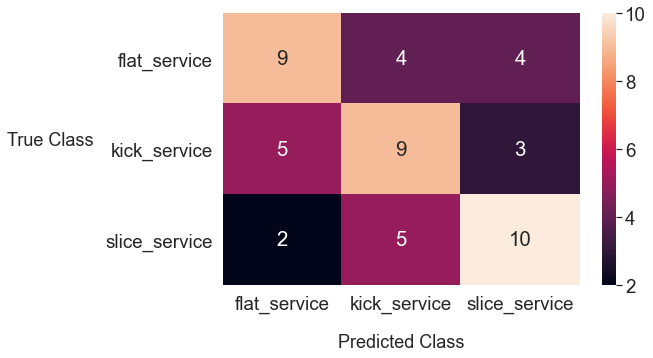

In [41]:
# Y_pred_class = model.predict_classes(x_test)
Y_test_class = np.argmax(Y_test, axis=1)

target_names = ['flat_service', 'kick_service', 'slice_service']
print(classification_report(Y_test_class, Y_pred_class, target_names=target_names))
conf_matrix = confusion_matrix(Y_test_class, Y_pred_class)

sns.set(font_scale=1.7)
df_cm = pd.DataFrame(conf_matrix, index = [i for i in target_names],
                  columns = [i for i in target_names])
plt.figure(figsize = (8,5))
ax = sns.heatmap(df_cm, annot=True)
ax.set_xlabel('Predicted Class', fontsize=18, labelpad=20)
ax.set_ylabel('True Class', fontsize=18, rotation=0, labelpad=55)
plt.show()